# Car Price Prediction

## **Data Exploration**

In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np #for large and multi-dimensional arrays
import pandas as pd #for data manipulation and analysis
import nltk 

In [2]:
##reading dataset
df = pd.read_csv('../Dataset/train-data.csv')

print(df.shape)
df.head()

(6019, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.shape

(6019, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

## **Data Preparation**

In [5]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
# now here we remove the columns in which more no. of null value are present
cols = [col for col in df.columns if (df[col].isnull().sum()/df.shape[0] * 100 < 70)]
data_trimmed = df[cols]
data_trimmed

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [7]:
 data_trimmed.isnull().sum()/df.shape[0]*100

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

In [8]:
# now in dataset there are many unnamed keyword, so we need to remove all
data_trimmed=data_trimmed.drop(labels="Unnamed: 0", axis = 1)
data_trimmed

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [9]:
data_trimmed.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [10]:
# now we remove the fill the null value
data_trimmed.fillna(method='ffill', inplace=True)
data_trimmed.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
# now we convert string data to numeric form, i.e removing units etc.
data_trimmed['Mileage'] = pd.to_numeric(data_trimmed['Mileage'].str.lower().str.split().str.get(0), errors='coerce')
data_trimmed['Engine'] = pd.to_numeric(data_trimmed['Engine'].str.lower().str.split().str.get(0), errors='coerce')
data_trimmed['Power'] = pd.to_numeric(data_trimmed['Power'].str.lower().str.split().str.get(0), errors='coerce')

In [12]:
data_trimmed

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


In [13]:
data_trimmed.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [14]:
cars=data_trimmed['Name'].str.lower().unique()

In [15]:
num_cars=len(cars)

In [16]:
num_cars

1852

In [17]:
# arranging the companies according to cars sold
companies=data_trimmed['Name'].str.lower().str.split().str.get(0).unique()

In [18]:
companies

array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini'],
      dtype=object)

In [19]:
company_count=data_trimmed['Name'].str.lower().str.split().str.get(0).to_frame()["Name"].value_counts()

In [20]:
company_count

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: Name, dtype: int64

## **Data Visualization**

<AxesSubplot:>

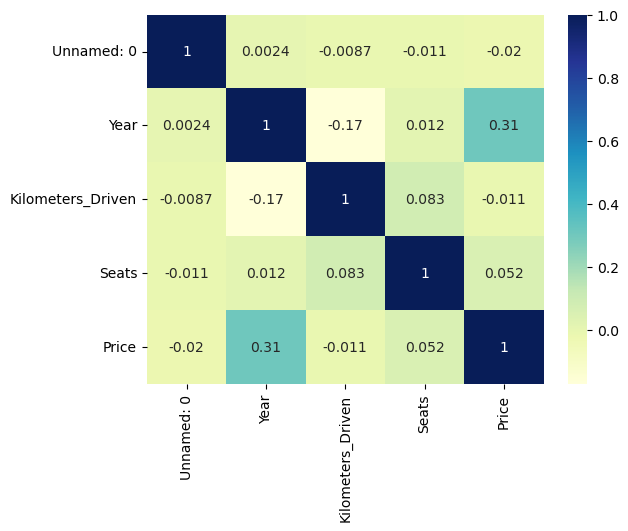

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap = 'YlGnBu')

<AxesSubplot:>

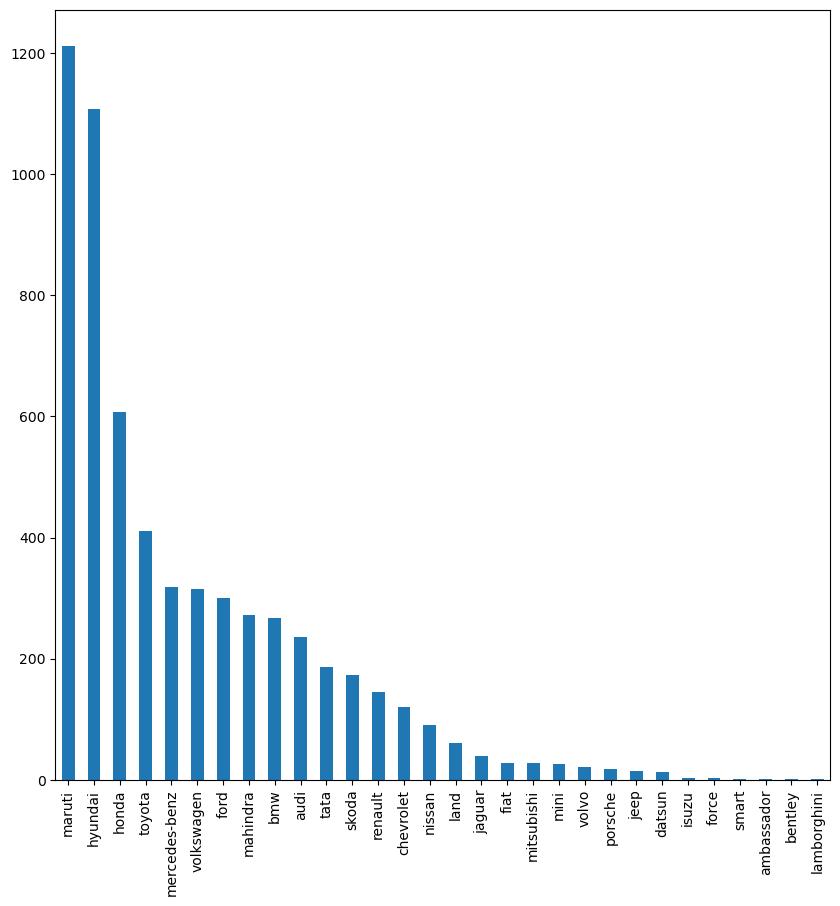

In [22]:
plt.figure(figsize=(10,10))
company_count.plot(kind='bar')

In [23]:
# separating the fuels according to mileage
fuel_type=data_trimmed['Fuel_Type'].str.lower().unique()
fuel_type

array(['cng', 'diesel', 'petrol', 'lpg', 'electric'], dtype=object)

In [24]:
mileage = data_trimmed.groupby('Fuel_Type').Mileage.mean()
mileage

Fuel_Type
CNG         25.418036
Diesel      18.620484
Electric    16.825000
LPG         19.385000
Petrol      17.415204
Name: Mileage, dtype: float64

<AxesSubplot:>

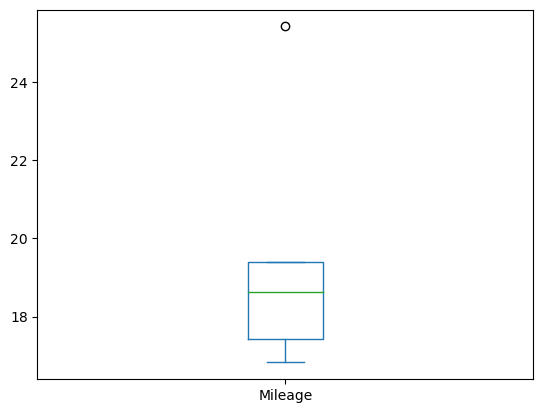

In [25]:
mileage.plot(kind='box')

<AxesSubplot:xlabel='Fuel_Type'>

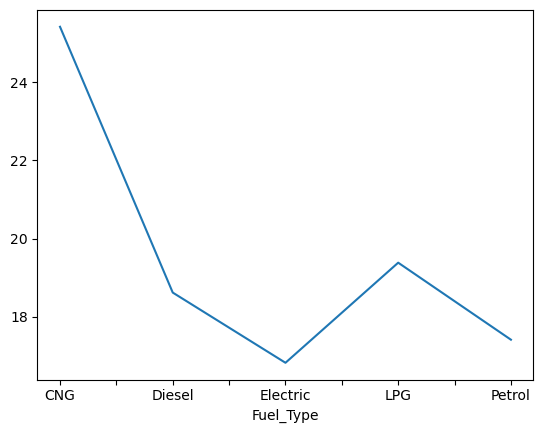

In [26]:
mileage.plot(kind='line')

In [27]:
# now we analyze the no. of car sold per year
year = data_trimmed['Year'].value_counts()
year

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64

<AxesSubplot:>

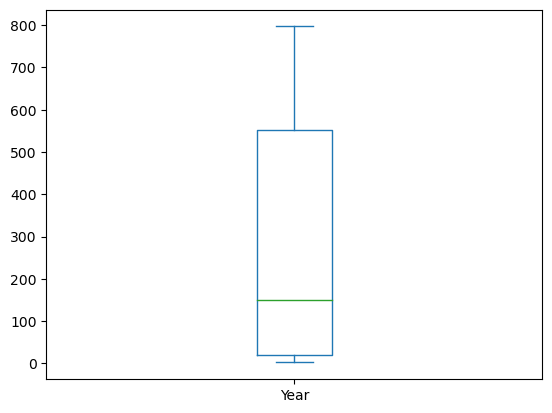

In [28]:
year.plot(kind='box')

<AxesSubplot:>

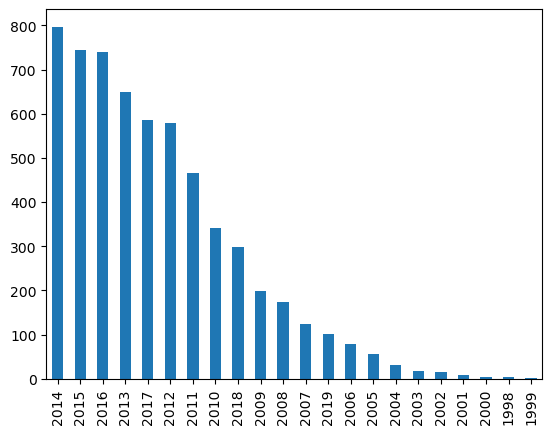

In [29]:
year.plot(kind='bar')

<AxesSubplot:>

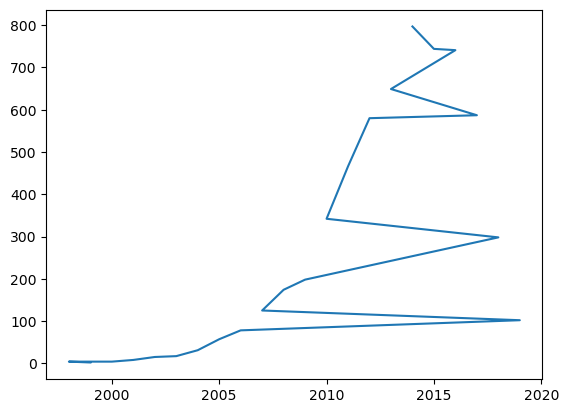

In [30]:
year.plot(kind='line')

In [31]:
comp = data_trimmed['Name'].str.split().str.get(0)
data_trimmed.insert(0, "Company", comp, True)

In [32]:
data_trimmed

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
6015,Hyundai,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
6016,Mahindra,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
6017,Maruti,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


In [33]:
# finding means of price
p = data_trimmed.groupby('Company').Price.mean()
p

Company
Ambassador         1.350000
Audi              25.537712
BMW               25.243146
Bentley           59.000000
Chevrolet          3.044463
Datsun             3.049231
Fiat               3.269286
Force              9.333333
Ford               6.889400
Honda              5.411743
Hyundai            5.343433
ISUZU             12.045000
Isuzu             20.000000
Jaguar            37.632250
Jeep              18.718667
Lamborghini      120.000000
Land              39.259500
Mahindra           8.045919
Maruti             4.517267
Mercedes-Benz     26.809874
Mini              26.896923
Mitsubishi        11.058889
Nissan             4.738352
Porsche           48.348333
Renault            5.799034
Skoda              7.559075
Smart              3.000000
Tata               3.562849
Toyota            11.580024
Volkswagen         5.307270
Volvo             18.802857
Name: Price, dtype: float64

<AxesSubplot:>

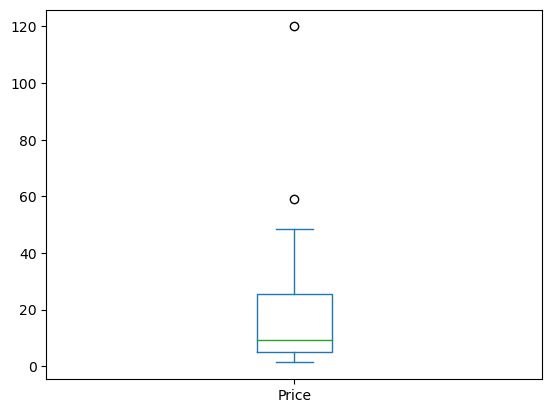

In [34]:
p.plot(kind='box')

<AxesSubplot:xlabel='Company'>

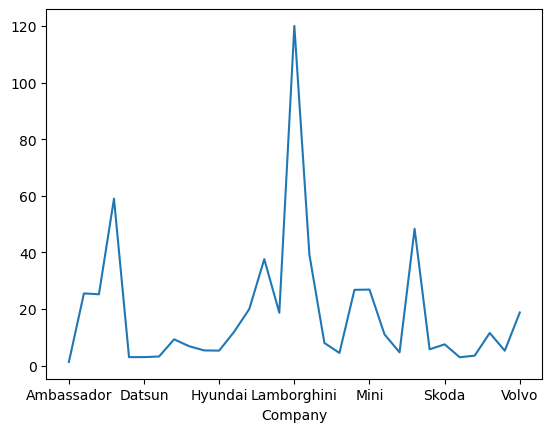

In [35]:
p.plot(kind='line')

In [36]:
# checking condition for second hand car sales
km = data_trimmed.groupby('Company').Kilometers_Driven.mean()
km

Company
Ambassador        80000.000000
Audi              53184.885593
BMW               79489.363296
Bentley           48000.000000
Chevrolet         63039.479339
Datsun            19239.846154
Fiat              69797.357143
Force             44000.000000
Ford              63318.680000
Honda             54961.605263
Hyundai           51393.624210
ISUZU             22711.000000
Isuzu             34429.000000
Jaguar            36380.725000
Jeep              27799.800000
Lamborghini        6500.000000
Land              59869.016667
Mahindra          69172.327206
Maruti            53624.812552
Mercedes-Benz     48766.745283
Mini              24890.307692
Mitsubishi        82250.629630
Nissan            65409.010989
Porsche           40046.777778
Renault           52888.924138
Skoda             68509.161850
Smart            103000.000000
Tata              67313.768817
Toyota            83642.445255
Volkswagen        57196.939683
Volvo             70539.666667
Name: Kilometers_Driven, dtype:

<AxesSubplot:xlabel='Company'>

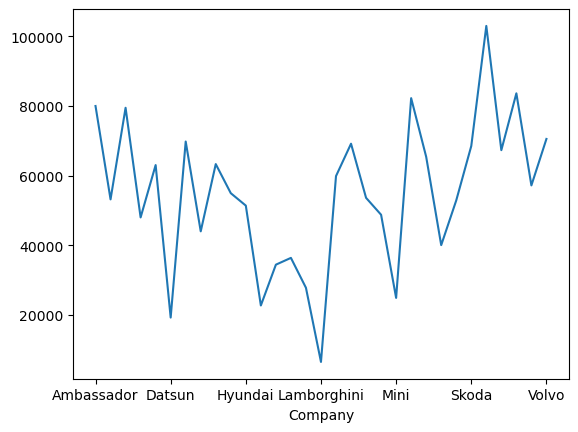

In [37]:
km.plot(kind='line')

<AxesSubplot:>

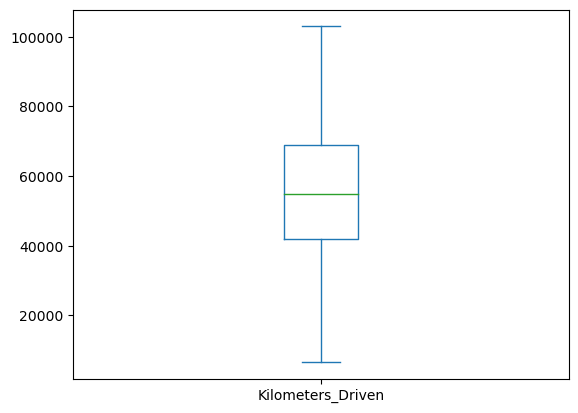

In [38]:
km.plot(kind='box')

In [39]:
feat_analysis=data_trimmed.drop(['Name', 'Company', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis = 1)
feat_analysis

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998,58.16,5.0,1.75
1,2015,41000,19.67,1582,126.20,5.0,12.50
2,2011,46000,18.20,1199,88.70,5.0,4.50
3,2012,87000,20.77,1248,88.76,7.0,6.00
4,2013,40670,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248,74.00,5.0,4.75
6015,2015,100000,24.40,1120,71.00,5.0,4.00
6016,2012,55000,14.00,2498,112.00,8.0,2.90
6017,2013,46000,18.90,998,67.10,5.0,2.65


<AxesSubplot:>

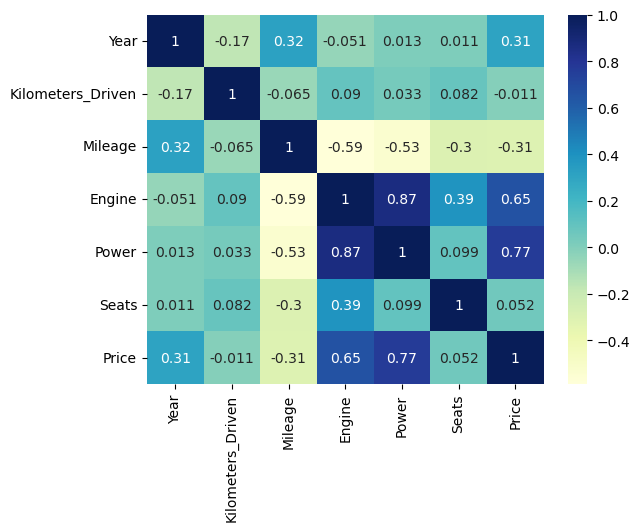

In [40]:
sns.heatmap(feat_analysis.corr(),annot=True,cmap = 'YlGnBu')

In [41]:
# converting string to digits
name_num = pd.get_dummies(data_trimmed.Name, drop_first=True)
name_num

,Audi A3 35 TDI Attraction,Audi A3 35 TDI Premium,Audi A3 35 TDI Premium Plus,Audi A3 35 TDI Technology,Audi A4 1.8 TFSI,Audi A4 1.8 TFSI Technology Edition,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI 177 Bhp Technology Edition,Audi A4 2.0 TDI Celebration Edition,...,Volvo S80 D5,Volvo V40 Cross Country D3,Volvo V40 D3,Volvo V40 D3 R Design,Volvo XC60 D4 SUMMUM,Volvo XC60 D4 Summum,Volvo XC60 D5,Volvo XC60 D5 Inscription,Volvo XC90 2007-2015 D5 AT AWD,Volvo XC90 2007-2015 D5 AWD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
company_num = pd.get_dummies(data_trimmed.Company, drop_first=True)
company_num

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
location_num = pd.get_dummies(data_trimmed.Location, drop_first=True)
location_num

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0
6017,0,0,0,0,0,0,0,1,0,0


In [44]:
fuel_num = pd.get_dummies(data_trimmed.Fuel_Type, drop_first=True)
fuel_num

,Diesel,Electric,LPG,Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
6014,1,0,0,0
6015,1,0,0,0
6016,1,0,0,0
6017,0,0,0,1


In [45]:
transmission_num = pd.get_dummies(data_trimmed.Transmission, drop_first=True)
transmission_num

,Manual
0,1
1,1
2,1
3,1
4,0
...,...
6014,1
6015,1
6016,1
6017,1


In [46]:
owner_num = pd.get_dummies(data_trimmed.Owner_Type, drop_first=True)
owner_num

,Fourth & Above,Second,Third
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
6014,0,0,0
6015,0,0,0
6016,0,1,0
6017,0,0,0


In [47]:
seats_num = pd.get_dummies(data_trimmed.Seats, drop_first=True)
seats_num

,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6014,0,0,1,0,0,0,0,0
6015,0,0,1,0,0,0,0,0
6016,0,0,0,0,0,1,0,0
6017,0,0,1,0,0,0,0,0


In [48]:
features = data_trimmed.drop(['Name', 'Company', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'], axis = 1)
features

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
0,2010,72000,26.60,998,58.16,1.75
1,2015,41000,19.67,1582,126.20,12.50
2,2011,46000,18.20,1199,88.70,4.50
3,2012,87000,20.77,1248,88.76,6.00
4,2013,40670,15.20,1968,140.80,17.74
...,...,...,...,...,...,...
6014,2014,27365,28.40,1248,74.00,4.75
6015,2015,100000,24.40,1120,71.00,4.00
6016,2012,55000,14.00,2498,112.00,2.90
6017,2013,46000,18.90,998,67.10,2.65


In [49]:
new_df = pd.concat([name_num, location_num, features, fuel_num, transmission_num, owner_num, seats_num], axis = 1)
new_df

,Audi A3 35 TDI Attraction,Audi A3 35 TDI Premium,Audi A3 35 TDI Premium Plus,Audi A3 35 TDI Technology,Audi A4 1.8 TFSI,Audi A4 1.8 TFSI Technology Edition,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI 177 Bhp Technology Edition,Audi A4 2.0 TDI Celebration Edition,...,Second,Third,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
new_df = new_df.dropna()
new_df

,Audi A3 35 TDI Attraction,Audi A3 35 TDI Premium,Audi A3 35 TDI Premium Plus,Audi A3 35 TDI Technology,Audi A4 1.8 TFSI,Audi A4 1.8 TFSI Technology Edition,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI 177 Bhp Technology Edition,Audi A4 2.0 TDI Celebration Edition,...,Second,Third,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## **Data Training**

In [51]:
y=new_df['Price']
X=new_df.drop(['Price'],axis=1)

In [52]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5911, dtype: float64

In [53]:
X

,Audi A3 35 TDI Attraction,Audi A3 35 TDI Premium,Audi A3 35 TDI Premium Plus,Audi A3 35 TDI Technology,Audi A4 1.8 TFSI,Audi A4 1.8 TFSI Technology Edition,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI 177 Bhp Technology Edition,Audi A4 2.0 TDI Celebration Edition,...,Second,Third,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# **Model Creation**

### **Linear Regression**

In [55]:
# Linear Regression

from sklearn.linear_model import LinearRegression
model2=LinearRegression() # created a 

In [56]:
model2.fit(X_train, y_train)
# Making predictions 
pred2 = model2.predict(X_test)
pred2

array([ 6.0732536 ,  2.38694749,  7.54733265, ...,  8.14062271,
        5.82490367, 10.17549365])

In [57]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(model2.score(X_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.9684216888773478


### **Ridge Regression**

In [58]:
# Importing model
from sklearn.linear_model import Ridge
model3 = Ridge()

In [59]:
#Fitting data into the model.
model3.fit(X_train, y_train)
# Making predictions on Test data 
pred3 = model3.predict(X_test)
pred3

array([ 6.25862513,  2.52182371,  8.51332524, ...,  9.33545976,
        6.01621486, 22.45452316])

In [60]:
print("Accuracy of the RidgeRegression model comes to be: \n ") 
print(model3.score(X_train,y_train))

Accuracy of the RidgeRegression model comes to be: 
 
0.9315184839053336


### **Lasso Regression**

In [61]:
# Importing model
from sklearn.linear_model import Lasso
model5 = Lasso()

In [62]:
#Fitting data into the model.
model5.fit(X_train, y_train)
# Making predictions on Test data 
pred5 = model5.predict(X_test)
pred5

array([ 9.7967925 ,  8.52671207,  7.7844377 , ..., 10.58355243,
        7.7403957 , 20.50920741])

In [63]:
print("Accuracy of the Lasso Regression model comes to be: \n ") 
print(model5.score(X_train,y_train))

Accuracy of the Lasso Regression model comes to be: 
 
0.6676867421149085


### **Decision Tree Regression**

In [64]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
model7 = DecisionTreeRegressor()

In [65]:
#Fitting data into the model.
model7.fit(X_train, y_train)
# Making predictions on Test data 
pred7 = model7.predict(X_test)
pred7

array([ 4.75,  4.  ,  6.89, ...,  8.5 ,  6.25, 24.25])

In [66]:
print("Accuracy of the DecisionTree Classifier model comes to be: \n ") 
print(model7.score(X_train,y_train))

Accuracy of the DecisionTree Classifier model comes to be: 
 
0.9999978329141381


# **Performance Evaluation**

In [67]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), model2.score(X_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), model3.score(X_train,y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred5)), model5.score(X_train,y_train)))
print("""Decision Tree Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred7)), model7.score(X_train,y_train)))
# print("""XG Boost Classifier\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred8)), accuracy_score(y_test,pred8)))

Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 7.8936 	 		 0.9684
Ridge Regression 		 4.4580 	 		 0.9315
Lasso Regression 		 6.2361 	 		 0.6677
Decision Tree Classifier 		 5.1247 	 		 1.0000
